<a href="https://colab.research.google.com/github/Aadish1206/Stocks/blob/main/stocks1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/ASIANPAINT.NS.csv")



In [6]:
df.shape


(247, 7)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-04,3455.0,3476.949951,3410.899902,3460.500000,3432.654297,981434
1,2022-08-05,3475.0,3491.949951,3451.550049,3473.899902,3445.946289,792478
2,2022-08-08,3465.0,3476.949951,3436.550049,3458.449951,3430.620605,724644
3,2022-08-10,3441.0,3449.850098,3396.000000,3411.649902,3384.197021,1089295
4,2022-08-11,3450.0,3477.949951,3390.000000,3405.199951,3377.799072,1410533


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       247 non-null    object 
 1   Open       247 non-null    float64
 2   High       247 non-null    float64
 3   Low        247 non-null    float64
 4   Close      247 non-null    float64
 5   Adj Close  247 non-null    float64
 6   Volume     247 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.6+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,3123.124490,3147.888050,3090.326723,3119.145338,3100.917078,9.836428e+05
std,235.389017,239.493858,233.038121,235.810319,236.965825,4.938600e+05
min,2705.649902,2741.000000,2685.850098,2705.649902,2687.751221,0.000000e+00
25%,2912.974976,2918.199951,2853.525024,2895.625000,2876.469605,6.662215e+05
50%,3130.000000,3155.000000,3097.449951,3123.699951,3103.035889,8.328430e+05
75%,3332.000000,3370.150024,3304.449951,3337.050049,3317.775024,1.096582e+06
max,3563.449951,3582.899902,3515.550049,3570.649902,3543.699951,3.229605e+06


In [10]:
cor_matrix = df.corr()
cor_matrix

<ipython-input-10-30bf47b04e07>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = df.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.994853,0.992773,0.986531,0.985643,-0.065526
High,0.994853,1.000000,0.993444,0.994388,0.993286,-0.039458
Low,0.992773,0.993444,1.000000,0.995457,0.995074,-0.120249
Close,0.986531,0.994388,0.995457,1.000000,0.999363,-0.092268
Adj Close,0.985643,0.993286,0.995074,0.999363,1.000000,-0.096069
Volume,-0.065526,-0.039458,-0.120249,-0.092268,-0.096069,1.000000


Text(0.5, 1.0, 'Correlation of Variables ')

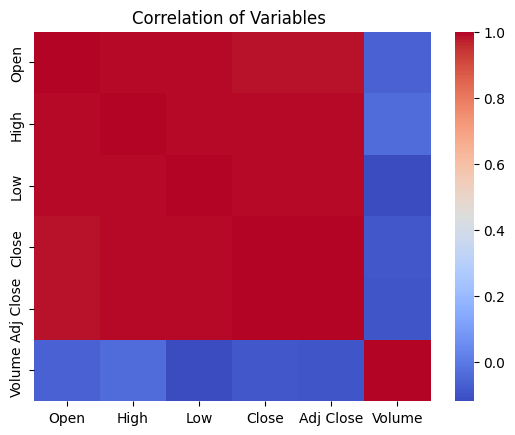

In [13]:
sns.heatmap(cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Variables ')

In [15]:
y = df[['Close']]
x = df[['Open','High','Low','Adj Close','Volume']]

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state  = 0)

In [19]:
x_train.shape

(172, 5)

In [20]:
x_test.shape

(75, 5)

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)

print('Intercept: ' ,  lm.intercept_)
print('coefficient : ' ,  lm.coef_)

Intercept:  [33.94259216]
coefficient :  [[-2.05480656e-01  3.57863410e-01  1.59674980e-01  6.80483443e-01
  -2.98363811e-06]]


In [22]:
yhat = lm.predict(x_test)

print(yhat)

[[3131.10378591]
 [2910.99738666]
 [3107.78253935]
 [2900.24237633]
 [3089.14113795]
 [2805.26796745]
 [2933.79560682]
 [2744.70897519]
 [2849.59407126]
 [2749.77695709]
 [3523.47800649]
 [3231.59644812]
 [2760.37095343]
 [3242.81964276]
 [3190.54546543]
 [3130.21699411]
 [3016.97464886]
 [3392.37341906]
 [3099.68279746]
 [3087.40449886]
 [3366.47592756]
 [3305.18370174]
 [2798.81732654]
 [2706.85402369]
 [3305.44273203]
 [3095.12729513]
 [2958.93641039]
 [2780.62451486]
 [3523.37034957]
 [2716.54213055]
 [3114.82696938]
 [2748.66945646]
 [3199.31995846]
 [3417.07257406]
 [3444.80046695]
 [2746.15920216]
 [3363.55675544]
 [3352.62514294]
 [2853.95493884]
 [2984.80432087]
 [2795.7384513 ]
 [2857.01013087]
 [3042.4962734 ]
 [3199.51319231]
 [2788.32937145]
 [3052.78003922]
 [3266.65908621]
 [3043.71773505]
 [3042.93337088]
 [3426.26801316]
 [2913.00230941]
 [3335.46193248]
 [2867.00957651]
 [3515.61177023]
 [2888.34599095]
 [2892.13504703]
 [3097.3884392 ]
 [2805.93651083]
 [3402.4859098

In [23]:
print({'Actual': y_test, 'Predicted': yhat})

{'Actual':            Close
89   3130.600098
109  2915.949951
74   3115.300049
110  2909.149902
71   3095.300049
..           ...
16   3391.600098
92   3082.149902
240  3373.000000
90   3055.899902
4    3405.199951

[75 rows x 1 columns], 'Predicted': array([[3131.10378591],
       [2910.99738666],
       [3107.78253935],
       [2900.24237633],
       [3089.14113795],
       [2805.26796745],
       [2933.79560682],
       [2744.70897519],
       [2849.59407126],
       [2749.77695709],
       [3523.47800649],
       [3231.59644812],
       [2760.37095343],
       [3242.81964276],
       [3190.54546543],
       [3130.21699411],
       [3016.97464886],
       [3392.37341906],
       [3099.68279746],
       [3087.40449886],
       [3366.47592756],
       [3305.18370174],
       [2798.81732654],
       [2706.85402369],
       [3305.44273203],
       [3095.12729513],
       [2958.93641039],
       [2780.62451486],
       [3523.37034957],
       [2716.54213055],
       [3114.82696938],
    

<ipython-input-24-7a78e9fa1bab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(y_test, hist = False , color  = 'r')
<ipython-input-24-7a78e9fa1bab>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, hist = False , color = 'b', ax = axl)


<Axes: ylabel='Density'>

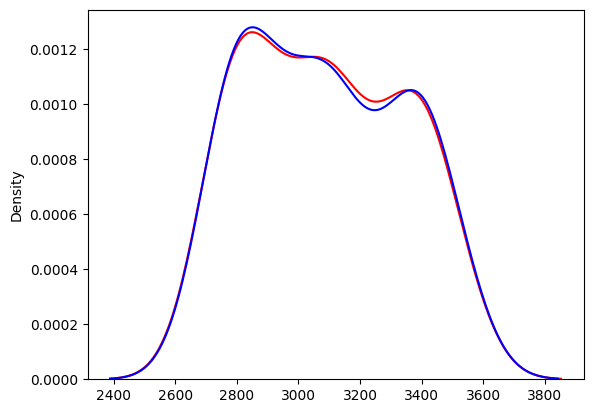

In [24]:
axl = sns.distplot(y_test, hist = False , color  = 'r')

sns.distplot(yhat, hist = False , color = 'b', ax = axl)

In [25]:
mean_squared_error(y_test, yhat )

68.51658941015422

In [26]:
rsqr = lm.score(x,y)

print('R - Squared :' , rsqr)

R - Squared : 0.9990752928894481


Text(0.5, 0, 'yhat')

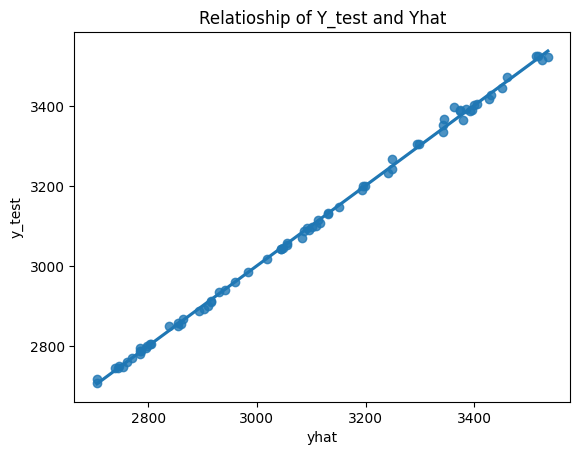

In [27]:
sns.regplot( x = y_test, y = yhat , data = df)
plt.title('Relatioship of Y_test and Yhat')
plt.ylabel('y_test')
plt.xlabel('yhat')

In [28]:
values = [[3326,3335,3302,3308,3324]]

closep = lm.predict(values)

print('Closing Price :', closep)

Closing Price : [[3322.26449994]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
